In [15]:
#from google.colab import drive
#drive.mount('/content/drive')


#!pip install deepchem rdkit matplotlib networkx

import deepchem as dc
from rdkit import Chem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from deepchem.feat import MolGraphConvFeaturizer
from deepchem.feat import CircularFingerprint
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from deepchem.feat import ConvMolFeaturizer
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
import deepchem as dc
#from drive.MyDrive.code.methods import *
from methods_fingerprints import *
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.model_selection import KFold

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
X,y = load_data_full("../data/SweetnersDB.xlsx")


Index(['Name', 'logSw', 'Chemical family', 'Dataset', 'Smiles'], dtype='object')


In [3]:
#X=X.drop(columns=['families'])

In [3]:
def create_cross_validation_df(X, n_splits=5, random_state=42):
    # Créer un objet KFold
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    # Initialiser des listes pour stocker les indices
    '''fold_numbers = []
    train_indices = []
    test_indices = []'''


    # Créer une copie de X pour y ajouter les nouvelles colonnes
    X_with_folds = np.copy(X)

    # Ajouter des colonnes pour chaque pli
    for fold in range(1, n_splits + 1):
        X_with_folds = np.column_stack((X_with_folds, np.full(X.shape[0], 'Training')))

    # Générer les plis stratifiés et mettre à jour les colonnes
    for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
        X_with_folds[test_index, -fold] = 'Test'

    # Créer la DataFrame
    #columns = [f'Feature_{i}' for i in range(X.shape[1])] + [f'Fold_{i}' for i in range(1, n_splits + 1)]
    columns = [f'Feature_{i}' for i in range(X.shape[1])] + [f'Fold_{i}' for i in range(1, n_splits + 1)]
    cv_df = pd.DataFrame(X_with_folds, columns=columns)
    return cv_df

# Exemple d'utilisation
'''# Supposons que vous ayez déjà vos données X et y
X = np.random.rand(100, 5)  # 100 échantillons, 5 caractéristiques
y = np.random.randint(0, 2, 100)  # 100 étiquettes binaires'''

# Créer la DataFrame de validation croisée
cv_df = create_cross_validation_df(X)

# Afficher les premiers résultats
print(cv_df.head())

                                           Feature_0 Feature_1    Fold_1  \
0          C[C@@H]1O[C@@H](O)[C@H](O)[C@H](O)[C@H]1O         0  Training   
1                                           OCC(O)CO         1      Test   
2         OC[C@H]1O[C@@H](O)[C@H](O)[C@@H](O)[C@H]1O         0  Training   
3  OC[C@H]1O[C@H](O[C@@H]2[C@@H](O)[C@H](O[C@@H]3...         0  Training   
4  OCC1OC(OCC2OC(OCC3OC(O[C@]4(CO)OC(CO)C(O)C4O)C...         0  Training   

     Fold_2    Fold_3    Fold_4    Fold_5  
0      Test  Training  Training  Training  
1  Training  Training  Training  Training  
2  Training      Test  Training  Training  
3  Training  Training  Training      Test  
4      Test  Training  Training  Training  


# Cross validation simple


In [4]:
smiles_tr =cv_df[cv_df.Fold_2=="Training"].Feature_0
smiles_test = cv_df[cv_df.Fold_2=="Test"].Feature_0
y_fold = pd.DataFrame(y)
y_fold["Fold_2"]=cv_df.Fold_2
logSweeter_tr = y_fold[y_fold.Fold_2=='Training'].logSw
logSweeter_test = y_fold[y_fold.Fold_2=='Test'].logSw

Fold_1
     logSw    Fold_1
0    -0.85  Training
1    -0.80      Test
2    -0.72  Training
3    -0.66  Training
4    -0.66  Training
..     ...       ...
307   3.88  Training
308   3.89  Training
309   4.00  Training
310   4.05      Test
311   4.15      Test

[312 rows x 2 columns]


[13:00:36] DEPRECATION WARNING: please use MorganGenerator
[13:00:36] DEPRECATION WARNING: please use MorganGenerator
[13:00:36] DEPRECATION WARNING: please use MorganGenerator
[13:00:36] DEPRECATION WARNING: please use MorganGenerator
[13:00:36] DEPRECATION WARNING: please use MorganGenerator
[13:00:36] DEPRECATION WARNING: please use MorganGenerator
[13:00:36] DEPRECATION WARNING: please use MorganGenerator
[13:00:36] DEPRECATION WARNING: please use MorganGenerator
[13:00:36] DEPRECATION WARNING: please use MorganGenerator
[13:00:36] DEPRECATION WARNING: please use MorganGenerator
[13:00:36] DEPRECATION WARNING: please use MorganGenerator
[13:00:36] DEPRECATION WARNING: please use MorganGenerator
[13:00:36] DEPRECATION WARNING: please use MorganGenerator
[13:00:36] DEPRECATION WARNING: please use MorganGenerator
[13:00:36] DEPRECATION WARNING: please use MorganGenerator
[13:00:36] DEPRECATION WARNING: please use MorganGenerator
[13:00:36] DEPRECATION WARNING: please use MorganGenerat

Score R² du modèle: 0.58
families
2    142
0     64
4     36
8     23
6     11
1     10
3     10
5      8
7      8
Name: count, dtype: int64
Fold_2
     logSw    Fold_2
0    -0.85      Test
1    -0.72  Training
2    -0.66  Training
3    -0.66  Training
4    -0.64      Test
..     ...       ...
307   3.09  Training
308   3.30      Test
309   3.60  Training
310   4.05  Training
311   4.15  Training

[312 rows x 2 columns]


[13:00:37] DEPRECATION WARNING: please use MorganGenerator
[13:00:37] DEPRECATION WARNING: please use MorganGenerator
[13:00:37] DEPRECATION WARNING: please use MorganGenerator
[13:00:37] DEPRECATION WARNING: please use MorganGenerator
[13:00:37] DEPRECATION WARNING: please use MorganGenerator
[13:00:37] DEPRECATION WARNING: please use MorganGenerator
[13:00:37] DEPRECATION WARNING: please use MorganGenerator
[13:00:37] DEPRECATION WARNING: please use MorganGenerator
[13:00:37] DEPRECATION WARNING: please use MorganGenerator
[13:00:37] DEPRECATION WARNING: please use MorganGenerator
[13:00:37] DEPRECATION WARNING: please use MorganGenerator
[13:00:37] DEPRECATION WARNING: please use MorganGenerator
[13:00:37] DEPRECATION WARNING: please use MorganGenerator
[13:00:37] DEPRECATION WARNING: please use MorganGenerator
[13:00:37] DEPRECATION WARNING: please use MorganGenerator
[13:00:37] DEPRECATION WARNING: please use MorganGenerator
[13:00:37] DEPRECATION WARNING: please use MorganGenerat

Score R² du modèle: 0.57
families
2    142
0     64
4     36
8     23
6     11
1     10
3     10
5      8
7      8
Name: count, dtype: int64
Fold_3
     logSw    Fold_3
0    -0.72  Training
1    -0.66  Training
2    -0.66      Test
3    -0.60  Training
4    -0.60  Training
..     ...       ...
307   2.06      Test
308   2.70  Training
309   2.70  Training
310   2.78  Training
311   3.30  Training

[312 rows x 2 columns]


[13:00:38] DEPRECATION WARNING: please use MorganGenerator
[13:00:39] DEPRECATION WARNING: please use MorganGenerator
[13:00:39] DEPRECATION WARNING: please use MorganGenerator
[13:00:39] DEPRECATION WARNING: please use MorganGenerator
[13:00:39] DEPRECATION WARNING: please use MorganGenerator
[13:00:39] DEPRECATION WARNING: please use MorganGenerator
[13:00:39] DEPRECATION WARNING: please use MorganGenerator
[13:00:39] DEPRECATION WARNING: please use MorganGenerator
[13:00:39] DEPRECATION WARNING: please use MorganGenerator
[13:00:39] DEPRECATION WARNING: please use MorganGenerator
[13:00:39] DEPRECATION WARNING: please use MorganGenerator
[13:00:39] DEPRECATION WARNING: please use MorganGenerator
[13:00:39] DEPRECATION WARNING: please use MorganGenerator
[13:00:39] DEPRECATION WARNING: please use MorganGenerator
[13:00:39] DEPRECATION WARNING: please use MorganGenerator
[13:00:39] DEPRECATION WARNING: please use MorganGenerator
[13:00:39] DEPRECATION WARNING: please use MorganGenerat

Score R² du modèle: -0.06
families
2    142
0     64
4     36
8     23
6     11
1     10
3     10
5      8
7      8
Name: count, dtype: int64
Fold_4
     logSw    Fold_4
0    -0.72  Training
1    -0.66  Training
2    -0.60  Training
3    -0.60  Training
4    -0.60  Training
..     ...       ...
307   2.65  Training
308  -0.80  Training
309   0.84  Training
310   1.36  Training
311   2.06  Training

[312 rows x 2 columns]


[13:00:39] DEPRECATION WARNING: please use MorganGenerator
[13:00:39] DEPRECATION WARNING: please use MorganGenerator
[13:00:39] DEPRECATION WARNING: please use MorganGenerator
[13:00:39] DEPRECATION WARNING: please use MorganGenerator
[13:00:39] DEPRECATION WARNING: please use MorganGenerator
[13:00:39] DEPRECATION WARNING: please use MorganGenerator
[13:00:39] DEPRECATION WARNING: please use MorganGenerator
[13:00:39] DEPRECATION WARNING: please use MorganGenerator
[13:00:39] DEPRECATION WARNING: please use MorganGenerator
[13:00:39] DEPRECATION WARNING: please use MorganGenerator
[13:00:39] DEPRECATION WARNING: please use MorganGenerator
[13:00:39] DEPRECATION WARNING: please use MorganGenerator
[13:00:39] DEPRECATION WARNING: please use MorganGenerator
[13:00:39] DEPRECATION WARNING: please use MorganGenerator
[13:00:39] DEPRECATION WARNING: please use MorganGenerator
[13:00:39] DEPRECATION WARNING: please use MorganGenerator
[13:00:39] DEPRECATION WARNING: please use MorganGenerat

Score R² du modèle: -0.36
families
2    142
0     64
4     36
8     23
6     11
1     10
3     10
5      8
7      8
Name: count, dtype: int64
Fold_5
     logSw    Fold_5
0    -0.72  Training
1    -0.66  Training
2    -0.60  Training
3    -0.60      Test
4    -0.60  Training
..     ...       ...
307   2.30  Training
308   1.16  Training
309   1.99      Test
310   2.11  Training
311   1.40  Training

[312 rows x 2 columns]


[13:00:40] DEPRECATION WARNING: please use MorganGenerator
[13:00:40] DEPRECATION WARNING: please use MorganGenerator
[13:00:40] DEPRECATION WARNING: please use MorganGenerator
[13:00:40] DEPRECATION WARNING: please use MorganGenerator
[13:00:40] DEPRECATION WARNING: please use MorganGenerator
[13:00:40] DEPRECATION WARNING: please use MorganGenerator
[13:00:40] DEPRECATION WARNING: please use MorganGenerator
[13:00:40] DEPRECATION WARNING: please use MorganGenerator
[13:00:40] DEPRECATION WARNING: please use MorganGenerator
[13:00:40] DEPRECATION WARNING: please use MorganGenerator
[13:00:40] DEPRECATION WARNING: please use MorganGenerator
[13:00:40] DEPRECATION WARNING: please use MorganGenerator
[13:00:40] DEPRECATION WARNING: please use MorganGenerator
[13:00:40] DEPRECATION WARNING: please use MorganGenerator
[13:00:40] DEPRECATION WARNING: please use MorganGenerator
[13:00:40] DEPRECATION WARNING: please use MorganGenerator
[13:00:41] DEPRECATION WARNING: please use MorganGenerat

Score R² du modèle: -0.05
families
2    142
0     64
4     36
8     23
6     11
1     10
3     10
5      8
7      8
Name: count, dtype: int64


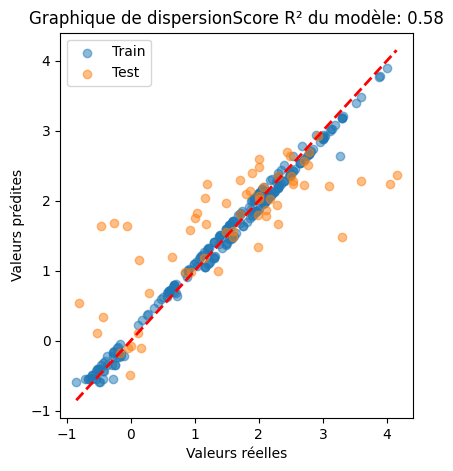

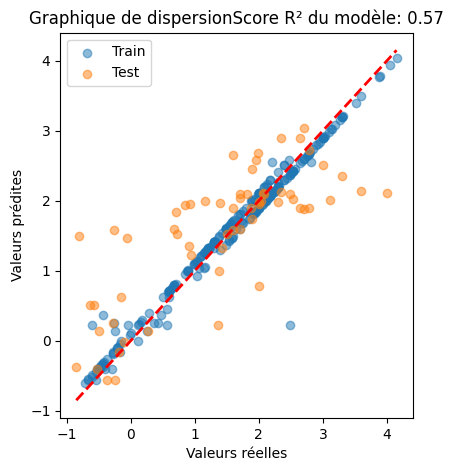

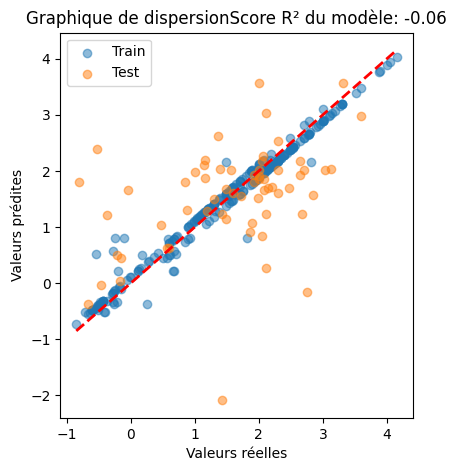

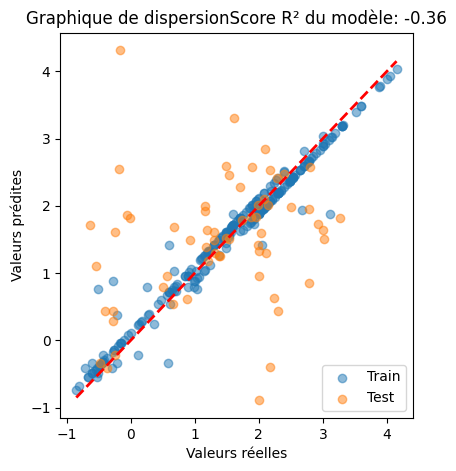

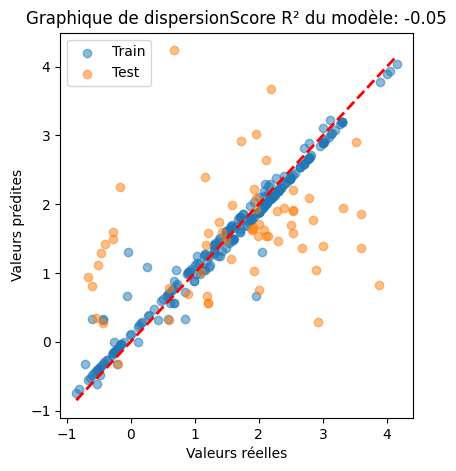

In [5]:
for i in range(1, 6):
  print(f"Fold_{i}")
  smiles_tr =cv_df[cv_df[f'Fold_{i}']=="Training"]['Feature_0']
  smiles_test = cv_df[cv_df[f'Fold_{i}']=="Test"]['Feature_0']
  y_fold = pd.DataFrame(y,columns=["logSw"])
  y_fold[f'Fold_{i}']=cv_df[f'Fold_{i}']
  print(y_fold)
  logSweeter_tr = y_fold[y_fold[f'Fold_{i}']=='Training'].logSw
  logSweeter_test = y_fold[y_fold[f'Fold_{i}']=='Test'].logSw

  X_tr,X_test,scaler_X = prepare_fingerprint(smiles_tr,smiles_test)
  y_tr,y_test,scaler_y = prepare_targets(logSweeter_tr,logSweeter_test)

  # Créer et entraîner le modèle SVR
  svr = SVR(kernel='rbf', C=100, gamma='scale', epsilon=0.1)
  svr.fit(X_tr, y_tr)
  # Évaluer le modèle
  score = svr.score(X_test, y_test)
  print(f"Score R² du modèle: {score:.2f}")
  # Faire des prédictions
  y_pred_train = svr.predict(X_tr)
  y_pred_test = svr.predict(X_test)
 # Inverser la normalisation pour obtenir les valeurs réelles
  y_pred_train = scaler_y.inverse_transform(y_pred_train.reshape(-1, 1)).ravel()
  y_pred_test = scaler_y.inverse_transform(y_pred_test.reshape(-1, 1)).ravel()
  y_train = scaler_y.inverse_transform(y_tr.reshape(-1, 1)).ravel()
  y_test = scaler_y.inverse_transform(y_test.reshape(-1, 1)).ravel()

  y = np.hstack((y_train,y_test))
  # Visualisation : Graphique de dispersion
  plt.figure(figsize=(10, 5))
  plt.subplot(1, 2, 1)
  plt.scatter(y_train, y_pred_train, alpha=0.5, label='Train')
  plt.scatter(y_test, y_pred_test, alpha=0.5, label='Test')
  plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
  plt.xlabel('Valeurs réelles')
  plt.ylabel('Valeurs prédites')
  plt.title('Graphique de dispersion' + f"Score R² du modèle: {score:.2f}")
  plt.legend()

  print(X['families'].value_counts())



# scoring arbre de décision


In [20]:
from sklearn.tree import DecisionTreeClassifier
results = []
for i in range(1, 6):
  print(f"Fold_{i}")
  smiles_tr =cv_df[cv_df[f'Fold_{i}']=="Training"]['Feature_0']
  smiles_test = cv_df[cv_df[f'Fold_{i}']=="Test"]['Feature_0']
  y_fold = pd.DataFrame(y,columns=["logSw"])
  y_fold[f'Fold_{i}']=cv_df[f'Fold_{i}']
  print(y_fold)
  logSweeter_tr = y_fold[y_fold[f'Fold_{i}']=='Training'].logSw
  logSweeter_test = y_fold[y_fold[f'Fold_{i}']=='Test'].logSw

  X_tr,X_test,scaler_X = prepare_fingerprint(smiles_tr,smiles_test)
  y_tr,y_test,scaler_y = prepare_targets(logSweeter_tr,logSweeter_test)

  sweet_thr = 0
  ytr = pd.DataFrame(y_tr,columns=['label'])
  target_tr =  ytr['label'].apply(lambda x: 0 if x <= sweet_thr else 1)
  ytest = pd.DataFrame(y_test,columns=['label'])
  target_test =  ytest['label'].apply(lambda x: 0 if x <= sweet_thr else 1)
  model = DecisionTreeClassifier(random_state=42)
  param_grid = {
              'criterion': ['gini', 'entropy'],  # 'log_loss' peut être utilisé pour des problèmes de classification multiclasse
              'max_depth': [None, 10, 20, 30],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']
          }
  grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=1)

  grid_search.fit(X_tr, target_tr)
  # Affichage des meilleurs paramètres et du meilleur score
  print(f"Best Parameters: {grid_search.best_params_}")
  print(f"Best Cross-validation Score: {grid_search.best_score_}")

  # Prédiction sur l'ensemble de test avec le meilleur modèle
  best_model = grid_search.best_estimator_
  y_pred = best_model.predict(X_test)



  # Évaluation du modèle
  accuracy = accuracy_score(target_test, y_pred)
  conf_matrix = confusion_matrix(target_test, y_pred)
  precision = precision_score(target_test, y_pred, average='weighted')
  recall = recall_score(target_test, y_pred, average='weighted')
  f1 = f1_score(target_test, y_pred, average='weighted')
  class_report = classification_report(target_test, y_pred)

  # Stockage des résultats
  results.append({
        'Fold': i,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'Best Parameters': grid_search.best_params_
    })

  print(f"Accuracy: {accuracy}")
  print("Confusion Matrix:")
  print(conf_matrix)
  print("Classification Report:")
  print(class_report)


# Création d'un DataFrame avec les résultats
results_df = pd.DataFrame(results)

# Affichage du tableau récapitulatif
print("Résultats pour chaque fold:")
print(results_df.to_string(index=False))

# Calcul et affichage des moyennes
print("\nMoyennes des métriques:")
print(results_df[['Accuracy', 'Precision', 'Recall', 'F1-score']].mean().to_string())

# Identification du meilleur fold
best_fold = results_df.loc[results_df['Accuracy'].idxmax()]
print("\nMeilleur fold:")
print(best_fold.to_string())

Fold_1
     logSw    Fold_1
0    -0.72  Training
1    -0.66      Test
2    -0.60  Training
3    -0.60  Training
4    -0.51  Training
..     ...       ...
307   1.17  Training
308   2.28  Training
309   2.92  Training
310   0.68      Test
311   1.99      Test

[312 rows x 2 columns]


[13:26:06] DEPRECATION WARNING: please use MorganGenerator
[13:26:06] DEPRECATION WARNING: please use MorganGenerator
[13:26:06] DEPRECATION WARNING: please use MorganGenerator
[13:26:06] DEPRECATION WARNING: please use MorganGenerator
[13:26:06] DEPRECATION WARNING: please use MorganGenerator
[13:26:06] DEPRECATION WARNING: please use MorganGenerator
[13:26:06] DEPRECATION WARNING: please use MorganGenerator
[13:26:06] DEPRECATION WARNING: please use MorganGenerator
[13:26:06] DEPRECATION WARNING: please use MorganGenerator
[13:26:06] DEPRECATION WARNING: please use MorganGenerator
[13:26:06] DEPRECATION WARNING: please use MorganGenerator
[13:26:06] DEPRECATION WARNING: please use MorganGenerator
[13:26:06] DEPRECATION WARNING: please use MorganGenerator
[13:26:06] DEPRECATION WARNING: please use MorganGenerator
[13:26:06] DEPRECATION WARNING: please use MorganGenerator
[13:26:06] DEPRECATION WARNING: please use MorganGenerator
[13:26:06] DEPRECATION WARNING: please use MorganGenerat

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-validation Score: 0.668
Accuracy: 0.5967741935483871
Confusion Matrix:
[[10 13]
 [12 27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.43      0.44        23
           1       0.68      0.69      0.68        39

    accuracy                           0.60        62
   macro avg       0.56      0.56      0.56        62
weighted avg       0.59      0.60      0.59        62

Fold_2
     logSw    Fold_2
0    -0.72      Test
1    -0.66  Training
2    -0.60  Training
3    -0.60  Training
4    -0.51      Test
..     ...       ...
307   1.17  Training
308   2.28      Test
309   2.92  Training
310   0.68  Training
311   1.99  Training

[312 rows x 2 columns]


[13:26:15] DEPRECATION WARNING: please use MorganGenerator
[13:26:15] DEPRECATION WARNING: please use MorganGenerator
[13:26:15] DEPRECATION WARNING: please use MorganGenerator
[13:26:15] DEPRECATION WARNING: please use MorganGenerator
[13:26:15] DEPRECATION WARNING: please use MorganGenerator
[13:26:15] DEPRECATION WARNING: please use MorganGenerator
[13:26:15] DEPRECATION WARNING: please use MorganGenerator
[13:26:15] DEPRECATION WARNING: please use MorganGenerator
[13:26:15] DEPRECATION WARNING: please use MorganGenerator
[13:26:15] DEPRECATION WARNING: please use MorganGenerator
[13:26:15] DEPRECATION WARNING: please use MorganGenerator
[13:26:15] DEPRECATION WARNING: please use MorganGenerator
[13:26:15] DEPRECATION WARNING: please use MorganGenerator
[13:26:15] DEPRECATION WARNING: please use MorganGenerator
[13:26:15] DEPRECATION WARNING: please use MorganGenerator
[13:26:15] DEPRECATION WARNING: please use MorganGenerator
[13:26:15] DEPRECATION WARNING: please use MorganGenerat

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Cross-validation Score: 0.664
Accuracy: 0.6290322580645161
Confusion Matrix:
[[17 17]
 [ 6 22]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.50      0.60        34
           1       0.56      0.79      0.66        28

    accuracy                           0.63        62
   macro avg       0.65      0.64      0.63        62
weighted avg       0.66      0.63      0.62        62

Fold_3
     logSw    Fold_3
0    -0.72  Training
1    -0.66  Training
2    -0.60      Test
3    -0.60  Training
4    -0.51  Training
..     ...       ...
307   1.17      Test
308   2.28  Training
309   2.92  Training
310   0.68  Training
311   1.99  Training

[312 rows x 2 columns]


[13:26:22] DEPRECATION WARNING: please use MorganGenerator
[13:26:22] DEPRECATION WARNING: please use MorganGenerator
[13:26:22] DEPRECATION WARNING: please use MorganGenerator
[13:26:22] DEPRECATION WARNING: please use MorganGenerator
[13:26:22] DEPRECATION WARNING: please use MorganGenerator
[13:26:22] DEPRECATION WARNING: please use MorganGenerator
[13:26:22] DEPRECATION WARNING: please use MorganGenerator
[13:26:22] DEPRECATION WARNING: please use MorganGenerator
[13:26:22] DEPRECATION WARNING: please use MorganGenerator
[13:26:22] DEPRECATION WARNING: please use MorganGenerator
[13:26:22] DEPRECATION WARNING: please use MorganGenerator
[13:26:22] DEPRECATION WARNING: please use MorganGenerator
[13:26:22] DEPRECATION WARNING: please use MorganGenerator
[13:26:22] DEPRECATION WARNING: please use MorganGenerator
[13:26:22] DEPRECATION WARNING: please use MorganGenerator
[13:26:22] DEPRECATION WARNING: please use MorganGenerator
[13:26:22] DEPRECATION WARNING: please use MorganGenerat

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5}
Best Cross-validation Score: 0.676
Accuracy: 0.5967741935483871
Confusion Matrix:
[[15 11]
 [14 22]]
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.58      0.55        26
           1       0.67      0.61      0.64        36

    accuracy                           0.60        62
   macro avg       0.59      0.59      0.59        62
weighted avg       0.60      0.60      0.60        62

Fold_4
     logSw    Fold_4
0    -0.72  Training
1    -0.66  Training
2    -0.60  Training
3    -0.60  Training
4    -0.51  Training
..     ...       ...
307   1.17  Training
308   2.28  Training
309   2.92  Training
310   0.68  Training
311   1.99  Training

[312 rows x 2 columns]


[13:26:27] DEPRECATION WARNING: please use MorganGenerator
[13:26:27] DEPRECATION WARNING: please use MorganGenerator
[13:26:27] DEPRECATION WARNING: please use MorganGenerator
[13:26:27] DEPRECATION WARNING: please use MorganGenerator
[13:26:27] DEPRECATION WARNING: please use MorganGenerator
[13:26:27] DEPRECATION WARNING: please use MorganGenerator
[13:26:27] DEPRECATION WARNING: please use MorganGenerator
[13:26:27] DEPRECATION WARNING: please use MorganGenerator
[13:26:27] DEPRECATION WARNING: please use MorganGenerator
[13:26:27] DEPRECATION WARNING: please use MorganGenerator
[13:26:27] DEPRECATION WARNING: please use MorganGenerator
[13:26:27] DEPRECATION WARNING: please use MorganGenerator
[13:26:27] DEPRECATION WARNING: please use MorganGenerator
[13:26:27] DEPRECATION WARNING: please use MorganGenerator
[13:26:27] DEPRECATION WARNING: please use MorganGenerator
[13:26:27] DEPRECATION WARNING: please use MorganGenerator
[13:26:27] DEPRECATION WARNING: please use MorganGenerat

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5}
Best Cross-validation Score: 0.6302857142857142
Accuracy: 0.6984126984126984
Confusion Matrix:
[[20  7]
 [12 24]]
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.74      0.68        27
           1       0.77      0.67      0.72        36

    accuracy                           0.70        63
   macro avg       0.70      0.70      0.70        63
weighted avg       0.71      0.70      0.70        63

Fold_5
     logSw    Fold_5
0    -0.72  Training
1    -0.66  Training
2    -0.60  Training
3    -0.60      Test
4    -0.51  Training
..     ...       ...
307   1.17  Training
308   2.28  Training
309   2.92      Test
310   0.68  Training
311   1.99  Training

[312 rows x 2 columns]


[13:26:32] DEPRECATION WARNING: please use MorganGenerator
[13:26:32] DEPRECATION WARNING: please use MorganGenerator
[13:26:32] DEPRECATION WARNING: please use MorganGenerator
[13:26:32] DEPRECATION WARNING: please use MorganGenerator
[13:26:32] DEPRECATION WARNING: please use MorganGenerator
[13:26:32] DEPRECATION WARNING: please use MorganGenerator
[13:26:32] DEPRECATION WARNING: please use MorganGenerator
[13:26:32] DEPRECATION WARNING: please use MorganGenerator
[13:26:32] DEPRECATION WARNING: please use MorganGenerator
[13:26:32] DEPRECATION WARNING: please use MorganGenerator
[13:26:32] DEPRECATION WARNING: please use MorganGenerator
[13:26:32] DEPRECATION WARNING: please use MorganGenerator
[13:26:32] DEPRECATION WARNING: please use MorganGenerator
[13:26:32] DEPRECATION WARNING: please use MorganGenerator
[13:26:32] DEPRECATION WARNING: please use MorganGenerator
[13:26:32] DEPRECATION WARNING: please use MorganGenerator
[13:26:32] DEPRECATION WARNING: please use MorganGenerat

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5}
Best Cross-validation Score: 0.6265306122448979
Accuracy: 0.6825396825396826
Confusion Matrix:
[[18  6]
 [14 25]]
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.75      0.64        24
           1       0.81      0.64      0.71        39

    accuracy                           0.68        63
   macro avg       0.68      0.70      0.68        63
weighted avg       0.71      0.68      0.69        63

Résultats pour chaque fold:
 Fold  Accuracy  Precision   Recall  F1-score                                                                                                    Best Parameters
    1  0.596774   0.593218 0.596774  0.594846   {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}
    2  0.629032   0.660086 0.629032  0.623690   {'crit

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
360 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

# scoring random forest

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
results = []
for i in range(1, 6):
  print(f"Fold_{i}")
  smiles_tr =cv_df[cv_df[f'Fold_{i}']=="Training"]['Feature_0']
  smiles_test = cv_df[cv_df[f'Fold_{i}']=="Test"]['Feature_0']
  y_fold = pd.DataFrame(y,columns=["logSw"])
  y_fold[f'Fold_{i}']=cv_df[f'Fold_{i}']
  print(y_fold)
  logSweeter_tr = y_fold[y_fold[f'Fold_{i}']=='Training'].logSw
  logSweeter_test = y_fold[y_fold[f'Fold_{i}']=='Test'].logSw

  X_tr,X_test,scaler_X = prepare_fingerprint(smiles_tr,smiles_test)
  y_tr,y_test,scaler_y = prepare_targets(logSweeter_tr,logSweeter_test)

  sweet_thr = 0
  ytr = pd.DataFrame(y_tr,columns=['label'])
  target_tr =  ytr['label'].apply(lambda x: 0 if x <= sweet_thr else 1)
  ytest = pd.DataFrame(y_test,columns=['label'])
  target_test =  ytest['label'].apply(lambda x: 0 if x <= sweet_thr else 1)
  model = RandomForestClassifier(random_state=42)
  param_grid = {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['auto', 'sqrt', 'log2']
        }

  grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=1)

  grid_search.fit(X_tr, target_tr)
  # Affichage des meilleurs paramètres et du meilleur score
  print(f"Best Parameters: {grid_search.best_params_}")
  print(f"Best Cross-validation Score: {grid_search.best_score_}")

  # Prédiction sur l'ensemble de test avec le meilleur modèle
  best_model = grid_search.best_estimator_
  y_pred = best_model.predict(X_test)



  # Évaluation du modèle
  accuracy = accuracy_score(target_test, y_pred)
  conf_matrix = confusion_matrix(target_test, y_pred)
  precision = precision_score(target_test, y_pred, average='weighted')
  recall = recall_score(target_test, y_pred, average='weighted')
  f1 = f1_score(target_test, y_pred, average='weighted')
  class_report = classification_report(target_test, y_pred)

  # Stockage des résultats
  results.append({
        'Fold': i,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'Best Parameters': grid_search.best_params_
    })

  print(f"Accuracy: {accuracy}")
  print("Confusion Matrix:")
  print(conf_matrix)
  print("Classification Report:")
  print(class_report)


# Création d'un DataFrame avec les résultats
results_df = pd.DataFrame(results)

# Affichage du tableau récapitulatif
print("Résultats pour chaque fold:")
print(results_df.to_string(index=False))

# Calcul et affichage des moyennes
print("\nMoyennes des métriques:")
print(results_df[['Accuracy', 'Precision', 'Recall', 'F1-score']].mean().to_string())

# Identification du meilleur fold
best_fold = results_df.loc[results_df['Accuracy'].idxmax()]
print("\nMeilleur fold:")
print(best_fold.to_string())

Fold_1
     logSw    Fold_1
0    -0.72  Training
1    -0.66      Test
2    -0.60  Training
3    -0.60  Training
4    -0.51  Training
..     ...       ...
307   1.17  Training
308   2.28  Training
309   2.92  Training
310   0.68      Test
311   1.99      Test

[312 rows x 2 columns]


[13:43:03] DEPRECATION WARNING: please use MorganGenerator
[13:43:03] DEPRECATION WARNING: please use MorganGenerator
[13:43:03] DEPRECATION WARNING: please use MorganGenerator
[13:43:03] DEPRECATION WARNING: please use MorganGenerator
[13:43:03] DEPRECATION WARNING: please use MorganGenerator
[13:43:03] DEPRECATION WARNING: please use MorganGenerator
[13:43:03] DEPRECATION WARNING: please use MorganGenerator
[13:43:03] DEPRECATION WARNING: please use MorganGenerator
[13:43:03] DEPRECATION WARNING: please use MorganGenerator
[13:43:03] DEPRECATION WARNING: please use MorganGenerator
[13:43:03] DEPRECATION WARNING: please use MorganGenerator
[13:43:03] DEPRECATION WARNING: please use MorganGenerator
[13:43:03] DEPRECATION WARNING: please use MorganGenerator
[13:43:03] DEPRECATION WARNING: please use MorganGenerator
[13:43:03] DEPRECATION WARNING: please use MorganGenerator
[13:43:03] DEPRECATION WARNING: please use MorganGenerator
[13:43:03] DEPRECATION WARNING: please use MorganGenerat

Best Parameters: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Best Cross-validation Score: 0.7
Accuracy: 0.6451612903225806
Confusion Matrix:
[[11 12]
 [10 29]]
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.48      0.50        23
           1       0.71      0.74      0.72        39

    accuracy                           0.65        62
   macro avg       0.62      0.61      0.61        62
weighted avg       0.64      0.65      0.64        62

Fold_2
     logSw    Fold_2
0    -0.72      Test
1    -0.66  Training
2    -0.60  Training
3    -0.60  Training
4    -0.51      Test
..     ...       ...
307   1.17  Training
308   2.28      Test
309   2.92  Training
310   0.68  Training
311   1.99  Training

[312 rows x 2 columns]


[13:47:27] DEPRECATION WARNING: please use MorganGenerator
[13:47:27] DEPRECATION WARNING: please use MorganGenerator
[13:47:27] DEPRECATION WARNING: please use MorganGenerator
[13:47:27] DEPRECATION WARNING: please use MorganGenerator
[13:47:27] DEPRECATION WARNING: please use MorganGenerator
[13:47:27] DEPRECATION WARNING: please use MorganGenerator
[13:47:27] DEPRECATION WARNING: please use MorganGenerator
[13:47:27] DEPRECATION WARNING: please use MorganGenerator
[13:47:27] DEPRECATION WARNING: please use MorganGenerator
[13:47:27] DEPRECATION WARNING: please use MorganGenerator
[13:47:27] DEPRECATION WARNING: please use MorganGenerator
[13:47:27] DEPRECATION WARNING: please use MorganGenerator
[13:47:27] DEPRECATION WARNING: please use MorganGenerator
[13:47:27] DEPRECATION WARNING: please use MorganGenerator
[13:47:27] DEPRECATION WARNING: please use MorganGenerator
[13:47:27] DEPRECATION WARNING: please use MorganGenerator
[13:47:27] DEPRECATION WARNING: please use MorganGenerat

Best Parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-validation Score: 0.6880000000000001
Accuracy: 0.6612903225806451
Confusion Matrix:
[[23 11]
 [10 18]]
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.68      0.69        34
           1       0.62      0.64      0.63        28

    accuracy                           0.66        62
   macro avg       0.66      0.66      0.66        62
weighted avg       0.66      0.66      0.66        62

Fold_3
     logSw    Fold_3
0    -0.72  Training
1    -0.66  Training
2    -0.60      Test
3    -0.60  Training
4    -0.51  Training
..     ...       ...
307   1.17      Test
308   2.28  Training
309   2.92  Training
310   0.68  Training
311   1.99  Training

[312 rows x 2 columns]


[13:51:48] DEPRECATION WARNING: please use MorganGenerator
[13:51:48] DEPRECATION WARNING: please use MorganGenerator
[13:51:48] DEPRECATION WARNING: please use MorganGenerator
[13:51:48] DEPRECATION WARNING: please use MorganGenerator
[13:51:48] DEPRECATION WARNING: please use MorganGenerator
[13:51:48] DEPRECATION WARNING: please use MorganGenerator
[13:51:48] DEPRECATION WARNING: please use MorganGenerator
[13:51:48] DEPRECATION WARNING: please use MorganGenerator
[13:51:48] DEPRECATION WARNING: please use MorganGenerator
[13:51:48] DEPRECATION WARNING: please use MorganGenerator
[13:51:48] DEPRECATION WARNING: please use MorganGenerator
[13:51:48] DEPRECATION WARNING: please use MorganGenerator
[13:51:48] DEPRECATION WARNING: please use MorganGenerator
[13:51:48] DEPRECATION WARNING: please use MorganGenerator
[13:51:48] DEPRECATION WARNING: please use MorganGenerator
[13:51:48] DEPRECATION WARNING: please use MorganGenerator
[13:51:48] DEPRECATION WARNING: please use MorganGenerat

Best Parameters: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Cross-validation Score: 0.628
Accuracy: 0.7096774193548387
Confusion Matrix:
[[15 11]
 [ 7 29]]
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.58      0.62        26
           1       0.72      0.81      0.76        36

    accuracy                           0.71        62
   macro avg       0.70      0.69      0.69        62
weighted avg       0.71      0.71      0.71        62

Fold_4
     logSw    Fold_4
0    -0.72  Training
1    -0.66  Training
2    -0.60  Training
3    -0.60  Training
4    -0.51  Training
..     ...       ...
307   1.17  Training
308   2.28  Training
309   2.92  Training
310   0.68  Training
311   1.99  Training

[312 rows x 2 columns]


[13:56:12] DEPRECATION WARNING: please use MorganGenerator
[13:56:12] DEPRECATION WARNING: please use MorganGenerator
[13:56:12] DEPRECATION WARNING: please use MorganGenerator
[13:56:12] DEPRECATION WARNING: please use MorganGenerator
[13:56:12] DEPRECATION WARNING: please use MorganGenerator
[13:56:12] DEPRECATION WARNING: please use MorganGenerator
[13:56:12] DEPRECATION WARNING: please use MorganGenerator
[13:56:12] DEPRECATION WARNING: please use MorganGenerator
[13:56:12] DEPRECATION WARNING: please use MorganGenerator
[13:56:12] DEPRECATION WARNING: please use MorganGenerator
[13:56:12] DEPRECATION WARNING: please use MorganGenerator
[13:56:12] DEPRECATION WARNING: please use MorganGenerator
[13:56:12] DEPRECATION WARNING: please use MorganGenerator
[13:56:12] DEPRECATION WARNING: please use MorganGenerator
[13:56:12] DEPRECATION WARNING: please use MorganGenerator
[13:56:12] DEPRECATION WARNING: please use MorganGenerator
[13:56:12] DEPRECATION WARNING: please use MorganGenerat

Best Parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Best Cross-validation Score: 0.6101224489795919
Accuracy: 0.6984126984126984
Confusion Matrix:
[[20  7]
 [12 24]]
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.74      0.68        27
           1       0.77      0.67      0.72        36

    accuracy                           0.70        63
   macro avg       0.70      0.70      0.70        63
weighted avg       0.71      0.70      0.70        63

Fold_5
     logSw    Fold_5
0    -0.72  Training
1    -0.66  Training
2    -0.60  Training
3    -0.60      Test
4    -0.51  Training
..     ...       ...
307   1.17  Training
308   2.28  Training
309   2.92      Test
310   0.68  Training
311   1.99  Training

[312 rows x 2 columns]


[14:00:32] DEPRECATION WARNING: please use MorganGenerator
[14:00:32] DEPRECATION WARNING: please use MorganGenerator
[14:00:32] DEPRECATION WARNING: please use MorganGenerator
[14:00:32] DEPRECATION WARNING: please use MorganGenerator
[14:00:32] DEPRECATION WARNING: please use MorganGenerator
[14:00:32] DEPRECATION WARNING: please use MorganGenerator
[14:00:32] DEPRECATION WARNING: please use MorganGenerator
[14:00:32] DEPRECATION WARNING: please use MorganGenerator
[14:00:33] DEPRECATION WARNING: please use MorganGenerator
[14:00:33] DEPRECATION WARNING: please use MorganGenerator
[14:00:33] DEPRECATION WARNING: please use MorganGenerator
[14:00:33] DEPRECATION WARNING: please use MorganGenerator
[14:00:33] DEPRECATION WARNING: please use MorganGenerator
[14:00:33] DEPRECATION WARNING: please use MorganGenerator
[14:00:33] DEPRECATION WARNING: please use MorganGenerator
[14:00:33] DEPRECATION WARNING: please use MorganGenerator
[14:00:33] DEPRECATION WARNING: please use MorganGenerat

Best Parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Best Cross-validation Score: 0.6262040816326531
Accuracy: 0.7142857142857143
Confusion Matrix:
[[16  8]
 [10 29]]
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.67      0.64        24
           1       0.78      0.74      0.76        39

    accuracy                           0.71        63
   macro avg       0.70      0.71      0.70        63
weighted avg       0.72      0.71      0.72        63

Résultats pour chaque fold:
 Fold  Accuracy  Precision   Recall  F1-score                                                                                                  Best Parameters
    1  0.645161   0.639242 0.645161  0.641532     {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
    2  0.661290   0.662521 0.661290  0.661734  {'max_depth':